In [2]:
# Load libraries
library(ggplot2)
library(sf)
library(rnaturalearth)
library(dplyr)
library(viridis)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'sf' was built under R version 4.3.3"
Linking to GEOS 3.11.2, GDAL 3.8.2, PROJ 9.3.1; sf_use_s2() is TRUE

Warning message:
"package 'rnaturalearth' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'viridis' was built under R version 4.3.3"
Loading required package: viridisLite



In [3]:
# Load India map data at the state level
india <- ne_states(country = "India", returnclass = "sf")


In [4]:
# Filter for Maharashtra (or your study area)
study_area <- india %>% filter(name == "Maharashtra")


In [5]:
# Example biodiversity data (species richness for regions within the study area)
biodiversity_data <- data.frame(
  region = c("Maharashtra"), # Adjust to your study regions
  richness = c(150) # Example biodiversity metric
)

# Merge the biodiversity data with the map data
study_area_biodiversity <- study_area %>%
  left_join(biodiversity_data, by = c("name" = "region"))


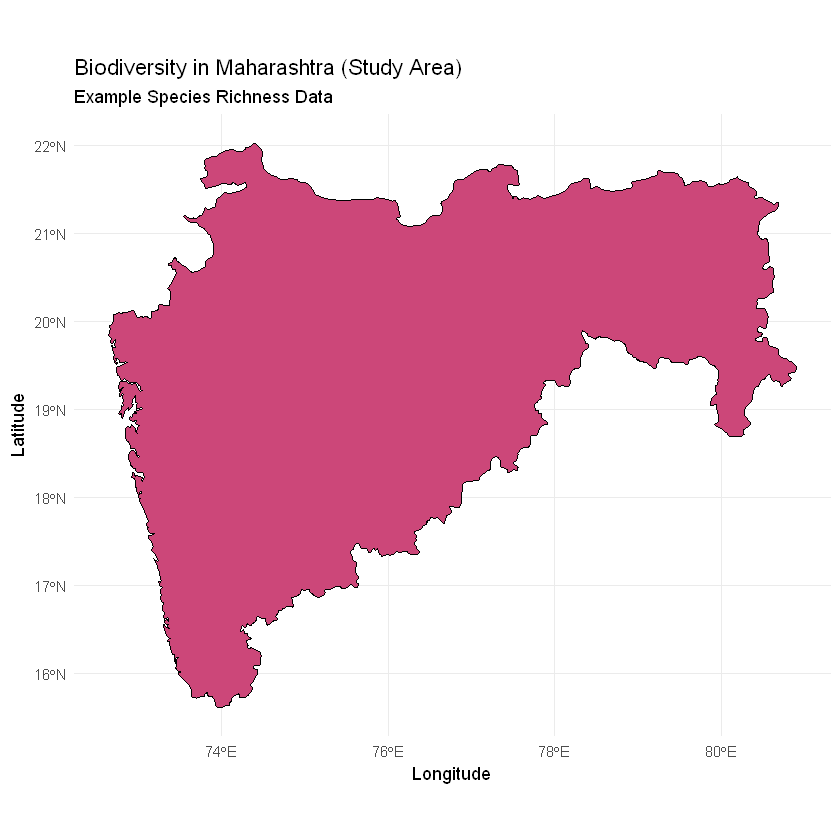

In [7]:
# Plotting the study area map with biodiversity data
ggplot(data = study_area_biodiversity) +
  geom_sf(aes(fill = richness), color = "black") +
  scale_fill_viridis(option = "plasma", name = "Species Richness") +
  theme_minimal() +
  labs(title = "Biodiversity in Maharashtra (Study Area)",
       subtitle = "Example Species Richness Data",
       x = "Longitude",
       y = "Latitude") +
  theme(legend.position = "center")
